Find the main "engine" in `./galxe_parser.py` and the output in `out.tab`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Time'>

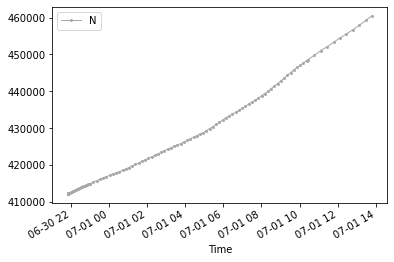

In [2]:
wdir = './' # Path

df = pd.read_csv(wdir+'out.tab', sep='\t', index_col=None, header=None, names=['Time', 'N'])
df['Time'] = pd.to_datetime(df['Time'])
df.plot(x='Time', y='N', lw=1, marker='o', color='darkgray', markersize=2)

---------